# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Developing Linear Regression Model

In [2]:
class GD_LinearRegression:
    def __init__(self, eta=0.0001, max_iterations=500, optimizer='BGD', mini_batch=64, momentum=0.9):
        self.eta = eta
        self.max_iterations = max_iterations
        self.optimizer = optimizer
        self.mini_batch = mini_batch
        self.momentum = momentum
        self.theta_ = np.zeros((1,))
        self.loss = []
        self.theta_s = []
        
    def fit(self, X, y):
        X_b, y = self.check_X_y(X, y)
        m, n = X_b.shape

        if self.optimizer == 'BGD':
            self.momentum = 0
            self.mini_batch = m
        elif self.optimizer == 'SGD':
            self.momentum = 0
            self.mini_batch = 1
        elif self.optimizer == 'MGD':
            self.momentum = 0
        elif self.optimizer == 'Momentum':
            self.mini_batch = m
        elif self.optimizer == 'NAG':
            self.mini_batch = m
            self.NAG(X_b, y)
            return self
        else:
            print("Unidentified Optimizer")
            return
        self.SGD(X_b, y)
        
        return self
        
    def SGD(self, X_b, y):
        m, n = X_b.shape
        vt = 0
        for i in range(self.max_iterations):
            for j in range(0, m, self.mini_batch):
                X_batch = X_b[j:j + self.mini_batch]
                y_batch = y[j:j + self.mini_batch]
                gradients = X_batch.T.dot(X_batch.dot(self.theta_)-y_batch) / len(X_batch)
                vt = vt*self.momentum - self.eta * gradients
                self.theta_ = self.theta_ + vt
                self.loss.append(X_batch.T.dot(X_batch.dot(self.theta_)-y_batch)**2)
                self.theta_s.append(self.theta_)
        return self
    
    def NAG(self, X_b, y):
        m, n = X_b.shape
        vt = 0
        for i in range(self.max_iterations):
            for j in range(0, m, self.mini_batch):
                X_batch = X_b[j:j + self.mini_batch]
                y_batch = y[j:j + self.mini_batch]
                self.theta_ = self.theta_ - self.momentum*vt
                gradients = X_batch.T.dot(X_batch.dot(self.theta_)-y_batch) / len(X_batch)
                self.theta_ = self.theta_ - self.eta * gradients
                vt = vt*self.momentum + self.eta * gradients
                self.loss.append(X_batch.T.dot(X_batch.dot(self.theta_)-y_batch)**2)
                self.theta_s.append(self.theta_)
        return self
    
    def predict(self, X):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        return X_b.dot(self.theta_)
    
    def check_X_y(self, X, y):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        m, n = X_b.shape
        y = np.array(y)
        self.theta_ = np.zeros(shape=n)
        return X_b, y
    
    def get_RSS(self, X, y):
        X = np.array(X)
        y = np.ravel(np.array(y))
        predictions = self.predict(X)
        residuals = predictions - y
        RSS = np.square(residuals).sum()
        return(RSS)
    
    def R2(self, X, y):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        m, n = X_b.shape
        y = np.array(y)
        
        y_bar = np.mean(y)
        sstor = np.sum((X_b.dot(self.theta_) - y_bar)**2)
        rss = self.get_RSS(X, y)
        R2 = 1-rss/sstor
        return R2
    
    def get_params(self, deep=True):
        weights = {}
        for i in range(self.theta_.shape[0]):
            name = 'theta_'+str(i)
            weights[name] = self.theta_[i]
        return weights

# Generate Data

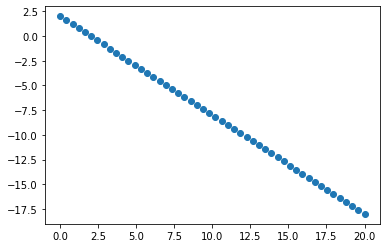

In [3]:
a = -1
b = 2

X = np.linspace(0, 20)
y = a * X + b

plt.scatter(X, y)

# Stochastic Gradient Descent

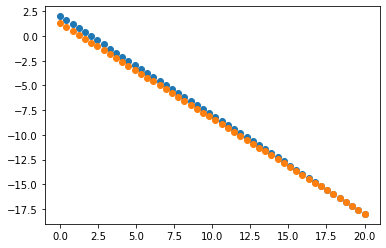

In [4]:
model1 = GD_LinearRegression(eta=0.001, mini_batch=5, max_iterations=100, optimizer='SGD')
model1.fit(X, y)

plt.scatter(X, y)
plt.scatter(X, model1.predict(X))

R2 =  0.9952270249974172


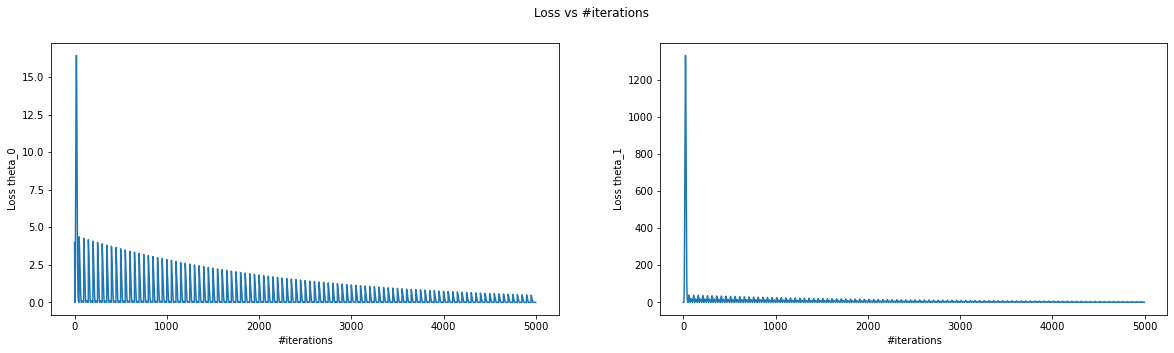

In [5]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model1.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model1.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
print("R2 = ", model1.R2(X,y))

[Text(0.5, 0, 'Theta'), Text(0, 0.5, 'Loss theta_1')]

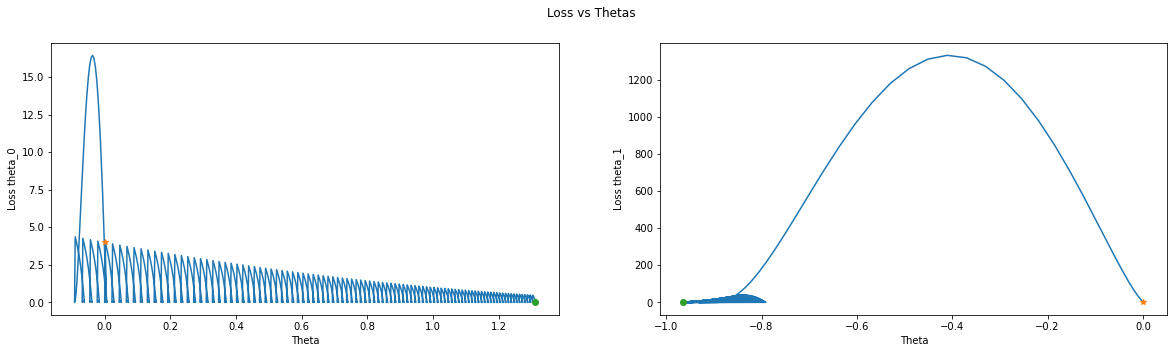

In [32]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs Thetas')
a2[0].plot(np.array(model1.theta_s).T[0], np.array(model1.loss).T[0])
a2[0].plot(np.array(model1.theta_s).T[0][0], np.array(model1.loss).T[0][0], '*')
a2[0].plot(np.array(model1.theta_s).T[0][-1], np.array(model1.loss).T[0][-1], 'o')
a2[0].set(xlabel='Theta', ylabel='Loss theta_0')
a2[1].plot(np.array(model1.theta_s).T[1], np.array(model1.loss).T[1])
a2[1].plot(np.array(model1.theta_s).T[1][0], np.array(model1.loss).T[1][0], '*')
a2[1].plot(np.array(model1.theta_s).T[1][-1], np.array(model1.loss).T[1][-1], 'o')
a2[1].set(xlabel='Theta', ylabel='Loss theta_1')

# Mini-Batch Gradient Descent

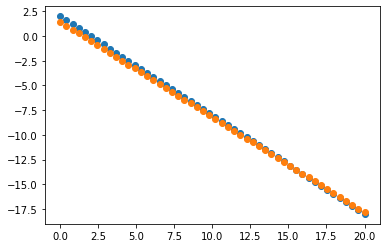

In [7]:
model2 = GD_LinearRegression(eta=0.001, mini_batch=5, max_iterations=500, optimizer='MGD')
model2.fit(X, y)

plt.scatter(X, y)
plt.scatter(X, model2.predict(X))

R2 =  0.9973170281318864


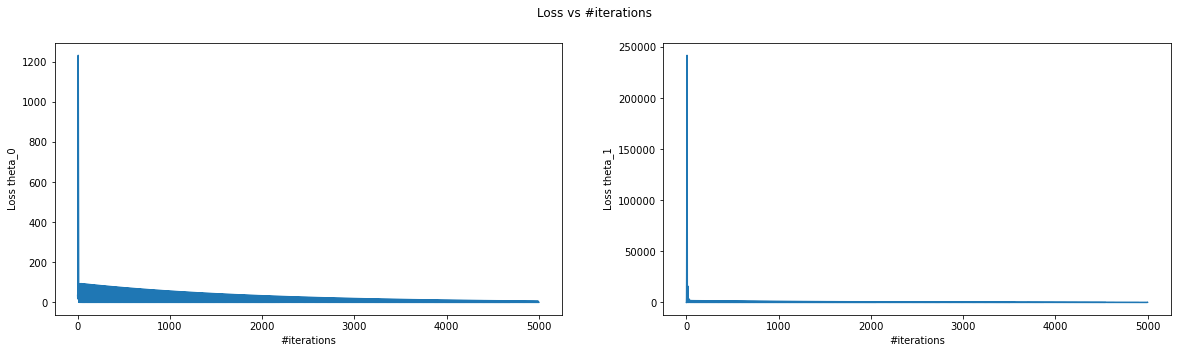

In [8]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model2.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model2.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
print("R2 = ", model2.R2(X,y))

[Text(0.5, 0, 'Theta'), Text(0, 0.5, 'Loss theta_1')]

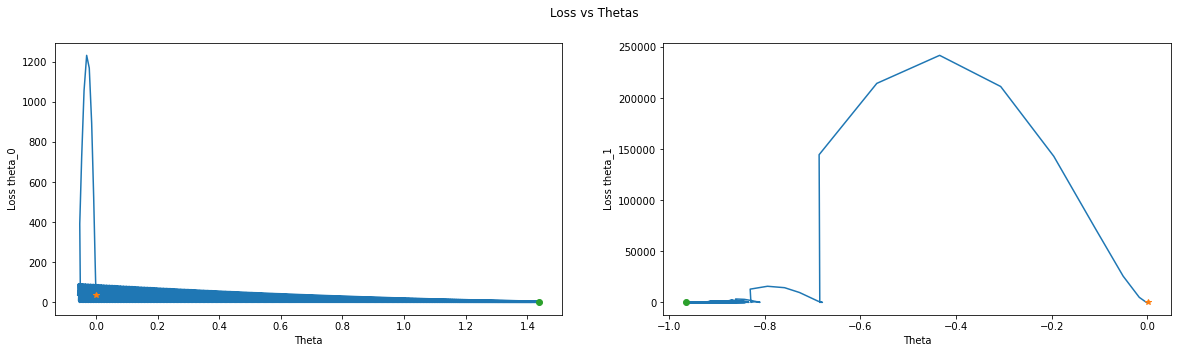

In [31]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs Thetas')
a2[0].plot(np.array(model2.theta_s).T[0], np.array(model2.loss).T[0])
a2[0].plot(np.array(model2.theta_s).T[0][0], np.array(model2.loss).T[0][0], '*')
a2[0].plot(np.array(model2.theta_s).T[0][-1], np.array(model2.loss).T[0][-1], 'o')
a2[0].set(xlabel='Theta', ylabel='Loss theta_0')
a2[1].plot(np.array(model2.theta_s).T[1], np.array(model2.loss).T[1])
a2[1].plot(np.array(model2.theta_s).T[1][0], np.array(model2.loss).T[1][0], '*')
a2[1].plot(np.array(model2.theta_s).T[1][-1], np.array(model2.loss).T[1][-1], 'o')
a2[1].set(xlabel='Theta', ylabel='Loss theta_1')

In [10]:
np.array(model2.theta_s).T[1]

array([ 6.33069554e-04, -2.15786531e-03, -1.66342441e-02, ...,
       -9.57605230e-01, -9.60426196e-01, -9.64198845e-01])

# Batch Gradient Descent

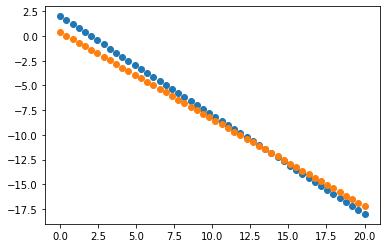

In [11]:
model3 = GD_LinearRegression(eta=0.001, mini_batch=5, max_iterations=1000, optimizer='BGD')
model3.fit(X, y)

plt.scatter(X, y)
plt.scatter(X, model3.predict(X))

R2 =  0.9757758519307305


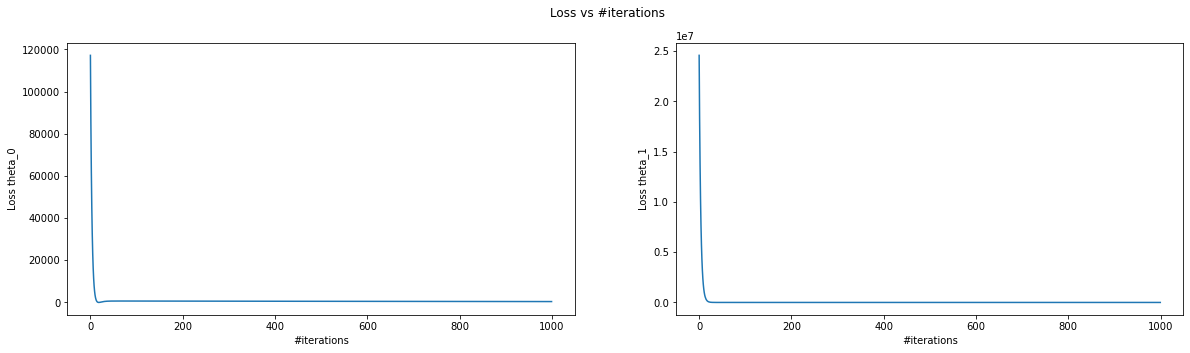

In [12]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model3.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model3.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
print("R2 = ", model3.R2(X,y))

[Text(0.5, 0, 'Theta'), Text(0, 0.5, 'Loss theta_1')]

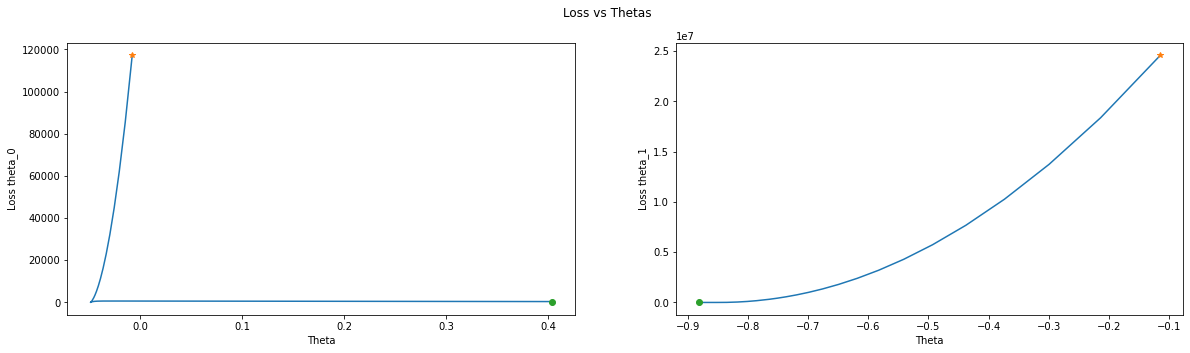

In [30]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs Thetas')
a2[0].plot(np.array(model3.theta_s).T[0], np.array(model3.loss).T[0])
a2[0].plot(np.array(model3.theta_s).T[0][0], np.array(model3.loss).T[0][0], '*')
a2[0].plot(np.array(model3.theta_s).T[0][-1], np.array(model3.loss).T[0][-1], 'o')
a2[0].set(xlabel='Theta', ylabel='Loss theta_0')
a2[1].plot(np.array(model3.theta_s).T[1], np.array(model3.loss).T[1])
a2[1].plot(np.array(model3.theta_s).T[1][0], np.array(model3.loss).T[1][0], '*')
a2[1].plot(np.array(model3.theta_s).T[1][-1], np.array(model3.loss).T[1][-1], 'o')
a2[1].set(xlabel='Theta', ylabel='Loss theta_1')

# Momentum

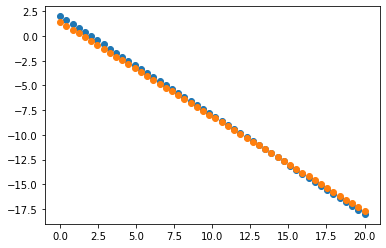

In [14]:
model4 = GD_LinearRegression(eta=0.001, mini_batch=5, max_iterations=500, optimizer='Momentum')
model4.fit(X, y)

plt.scatter(X, y)
plt.scatter(X, model4.predict(X))

R2 =  0.9973860920063315


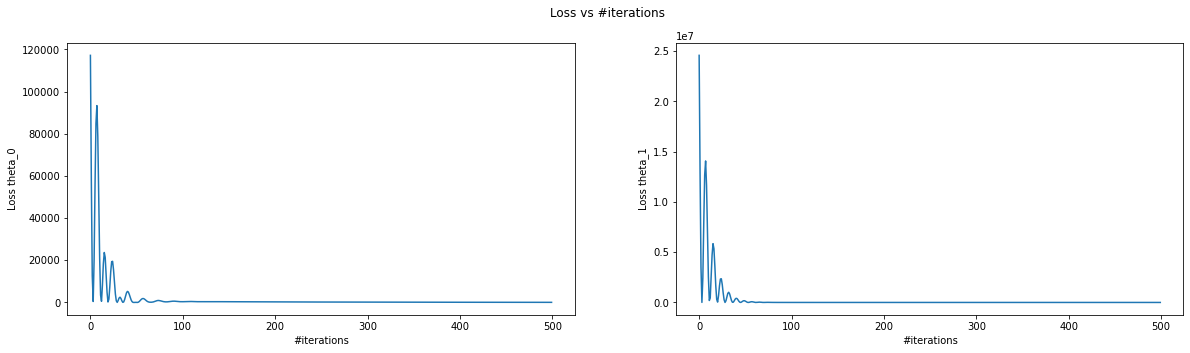

In [15]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model4.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model4.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
print("R2 = ", model4.R2(X,y))

[Text(0.5, 0, 'Theta'), Text(0, 0.5, 'Loss theta_1')]

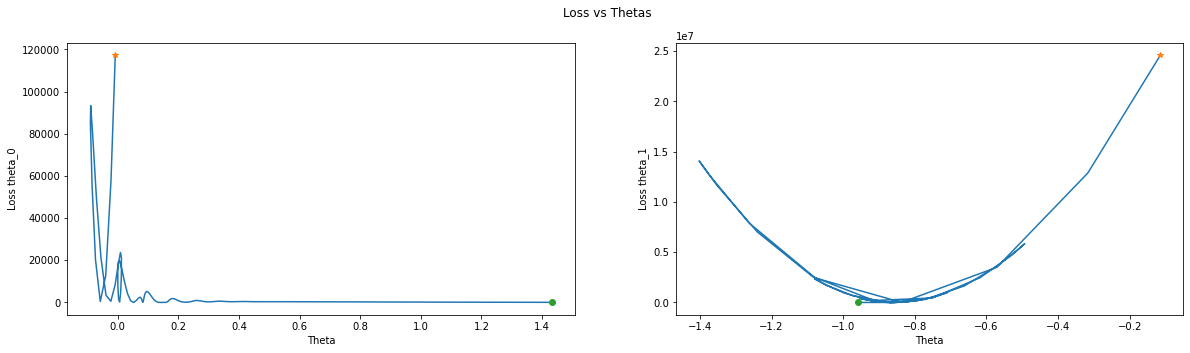

In [29]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs Thetas')
a2[0].plot(np.array(model4.theta_s).T[0], np.array(model4.loss).T[0])
a2[0].plot(np.array(model4.theta_s).T[0][0], np.array(model4.loss).T[0][0], '*')
a2[0].plot(np.array(model4.theta_s).T[0][-1], np.array(model4.loss).T[0][-1], 'o')
a2[0].set(xlabel='Theta', ylabel='Loss theta_0')
a2[1].plot(np.array(model4.theta_s).T[1], np.array(model4.loss).T[1])
a2[1].plot(np.array(model4.theta_s).T[1][0], np.array(model4.loss).T[1][0], '*')
a2[1].plot(np.array(model4.theta_s).T[1][-1], np.array(model4.loss).T[1][-1], 'o')
a2[1].set(xlabel='Theta', ylabel='Loss theta_1')

# NAG

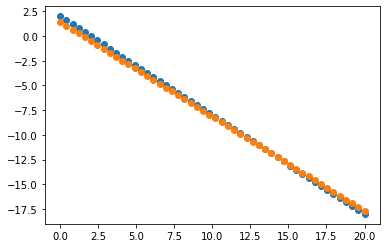

In [17]:
model5 = GD_LinearRegression(eta=0.001, mini_batch=5, max_iterations=500, optimizer='NAG')
model5.fit(X, y)

plt.scatter(X, y)
plt.scatter(X, model5.predict(X))

R2 =  0.9973693638631004


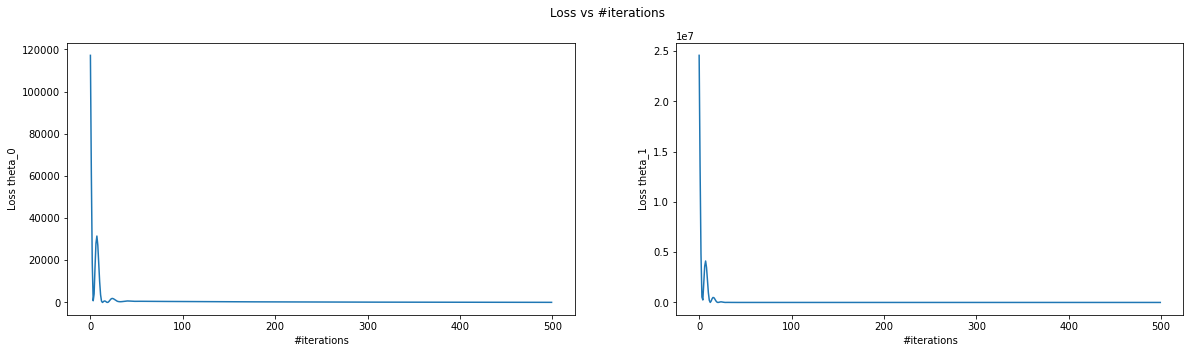

In [18]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model5.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model5.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
print("R2 = ", model5.R2(X,y))

[Text(0.5, 0, 'Theta'), Text(0, 0.5, 'Loss theta_1')]

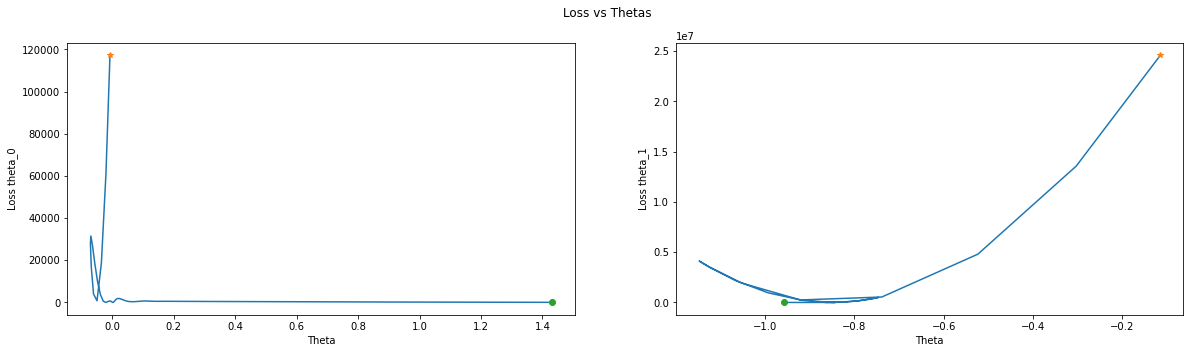

In [28]:
fig2, a2 =  plt.subplots(1,2,figsize=(20,5))
fig2.suptitle('Loss vs Thetas')
a2[0].plot(np.array(model5.theta_s).T[0], np.array(model5.loss).T[0])
a2[0].plot(np.array(model5.theta_s).T[0][0], np.array(model5.loss).T[0][0], '*')
a2[0].plot(np.array(model5.theta_s).T[0][-1], np.array(model5.loss).T[0][-1], 'o')
a2[0].set(xlabel='Theta', ylabel='Loss theta_0')
a2[1].plot(np.array(model5.theta_s).T[1], np.array(model5.loss).T[1])
a2[1].plot(np.array(model5.theta_s).T[1][0], np.array(model5.loss).T[1][0], '*')
a2[1].plot(np.array(model5.theta_s).T[1][-1], np.array(model5.loss).T[1][-1], 'o')
a2[1].set(xlabel='Theta', ylabel='Loss theta_1')